# Fraud Transaction Detector | Imbalancing technique

### Description

**In this notebook, it will be described the process of creating a Fraud transaction detector based on transactions dataset made by considering simulated users through various terminals throughout the period from January 2023 to June 2023. However, the data is highly imbalanced, with only a small percentage (0.1345%) of transactions classified as fraudulent..**

### Targets:

* Perform an Exploratory Data Analysis.
* Transform, Standardize and performe an Imbalancing techique the data.
* Create a Logistic Regression model.
* Perform the metrics regard to the fastest horses.

## 1. Library importation

In [1]:
# Data management
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# Oversampling Technique
from imblearn.over_sampling import SMOTE

from collections import Counter

# Data scaling
from sklearn.preprocessing import StandardScaler as SS

# Data spliting
from sklearn.model_selection import train_test_split as tts

# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## 2. Load and Information of the data

In [2]:
cols = ['Index', 'Transaction ID', 'Trans Datetime', 'Cusotmer ID',
       'Terminal ID', 'Trans Amount', 'Trans Time Seconds',
       'Trans Time Days', 'Trans Fraud', 'Tans Fraud Scenario']
df = pd.read_csv('Final Transactions.csv', names=cols)
df = df.drop(df.index[0]).reset_index(drop=True)
df

C:\Users\betoa\AppData\Local\Temp\ipykernel_3256\3827002884.py:4: DtypeWarning: Columns (1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Final Transactions.csv', names=cols)


,Index,Transaction ID,Trans Datetime,Cusotmer ID,Terminal ID,Trans Amount,Trans Time Seconds,Trans Time Days,Trans Fraud,Tans Fraud Scenario
0,0.0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1.0,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2.0,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3.0,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4.0,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1754150,1754150.0,1754150,2023-07-02 23:56:36,161,655,531.43,15810996,182,0,0
1754151,1754151.0,1754151,2023-07-02 23:57:38,4342,6181,10.4,15811058,182,0,0
1754152,1754152.0,1754152,2023-07-02 23:58:21,618,1502,26.62,15811101,182,0,0
1754153,1754153.0,1754153,2023-07-02 23:59:52,4056,3067,550.43,15811192,182,0,0


### Data fields
* Index
* Transaction ID
* Transaction Datetime
* Customer ID
* Terminal ID
* Transaction Amount
* Transaction Time in Seconds
* Transaction Time in Days
* Transaction Fraud: 0 for a legitimate transaction, or the value 1 for a fraudulent transaction.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Index                float64
 1   Transaction ID       object 
 2   Trans Datetime       object 
 3   Cusotmer ID          object 
 4   Terminal ID          object 
 5   Trans Amount         object 
 6   Trans Time Seconds   object 
 7   Trans Time Days      object 
 8   Trans Fraud          object 
 9   Tans Fraud Scenario  object 
dtypes: float64(1), object(9)
memory usage: 133.8+ MB


In [4]:
def casting_to_float(column):
    # Convert a column from strings to floats
    df[column] = pd.to_numeric(df[column], errors='coerce').astype(float)
    
def casting_to_int(column):
    # Convert a column of strings to integers
    df[column] = pd.to_numeric(df[column], errors='coerce').astype(int)

        
to_int = ['Transaction ID', 'Cusotmer ID',
       'Terminal ID', 'Trans Time Seconds',
       'Trans Time Days', 'Trans Fraud']

casting_to_float('Trans Amount')

for i in to_int:
    casting_to_int(i)
    
    
df = df.drop(['Index', 'Transaction ID','Trans Datetime', 'Tans Fraud Scenario'], axis=1)
    
    
df.head()

,Cusotmer ID,Terminal ID,Trans Amount,Trans Time Seconds,Trans Time Days,Trans Fraud
0,596,3156,533.07,31,0,0
1,4961,3412,808.56,130,0,0
2,2,1365,1442.94,476,0,1
3,4128,8737,620.65,569,0,0
4,927,9906,490.66,634,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Cusotmer ID         int32  
 1   Terminal ID         int32  
 2   Trans Amount        float64
 3   Trans Time Seconds  int32  
 4   Trans Time Days     int32  
 5   Trans Fraud         int32  
dtypes: float64(1), int32(5)
memory usage: 46.8 MB


## 3. Exploratory Data Analysis

### 3.1 Dataset descriptions

In [6]:
df.describe()

,Cusotmer ID,Terminal ID,Trans Amount,Trans Time Seconds,Trans Time Days,Trans Fraud
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01,1.345200e-01
std,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01,3.412103e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00
25%,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01,0.000000e+00
50%,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01,0.000000e+00
75%,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02,0.000000e+00
max,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02,1.000000e+00


In [7]:
df[df['Trans Fraud'] == 1][['Trans Amount', 'Trans Time Seconds', 'Trans Time Days']].describe()

,Trans Amount,Trans Time Seconds,Trans Time Days
count,235969.000000,2.359690e+05,235969.000000
mean,1477.560343,7.933920e+06,91.327721
std,2973.502497,4.556081e+06,52.731309
min,0.200000,4.760000e+02,0.000000
25%,1085.040000,3.996473e+06,46.000000
50%,1212.470000,7.923149e+06,91.000000
75%,1410.640000,1.187945e+07,137.000000
max,647837.500000,1.581098e+07,182.000000


In [8]:
df[df['Trans Fraud'] == 0][['Trans Amount', 'Trans Time Seconds', 'Trans Time Days']].describe()

,Trans Amount,Trans Time Seconds,Trans Time Days
count,1.518186e+06,1.518186e+06,1.518186e+06
mean,3.939092e+02,7.898464e+06,9.091741e+01
std,2.753447e+02,4.566567e+06,5.285332e+01
min,0.000000e+00,3.100000e+01,0.000000e+00
25%,1.530100e+02,3.937356e+06,4.500000e+01
50%,3.533000e+02,7.899675e+06,9.100000e+01
75%,6.054000e+02,1.186333e+07,1.370000e+02
max,1.000000e+03,1.581120e+07,1.820000e+02


### 3.2 Missing data

[Text(0.5, 1.0, 'Existent data (purple) and missing data (yellow) ratio')]

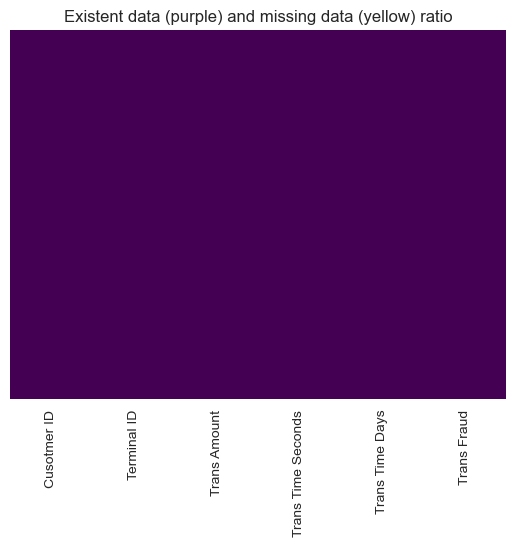

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title = 'Existent data (purple) and missing data (yellow) ratio')

In [10]:
df.isnull().sum()

Cusotmer ID           0
Terminal ID           0
Trans Amount          0
Trans Time Seconds    0
Trans Time Days       0
Trans Fraud           0
dtype: int64

### 3.3 Features of the frauds

[Text(0.5, 1.0, 'Fraud Count')]

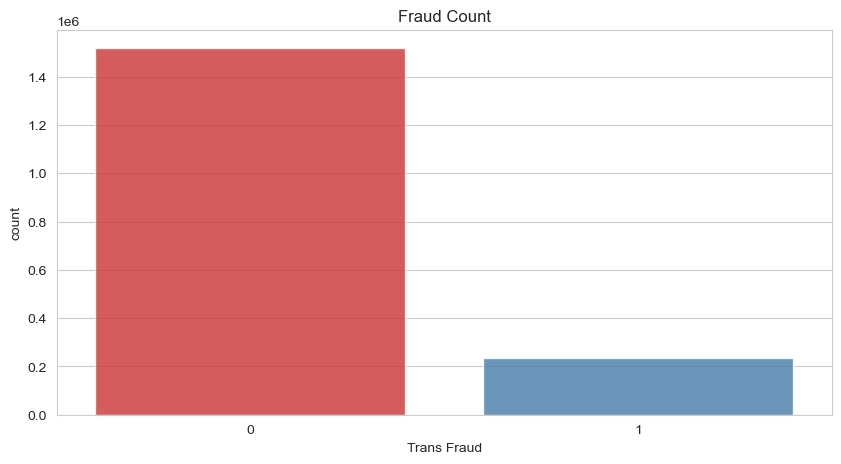

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Trans Fraud', palette='Set1', alpha=0.8).set(title = 'Fraud Count')

Based on the previous graph, it can be seen that the dataset is unbalanced and biased towards data that is not categorized as fraud, this can represent a problem for the creation of the model, since it will be trained biased.

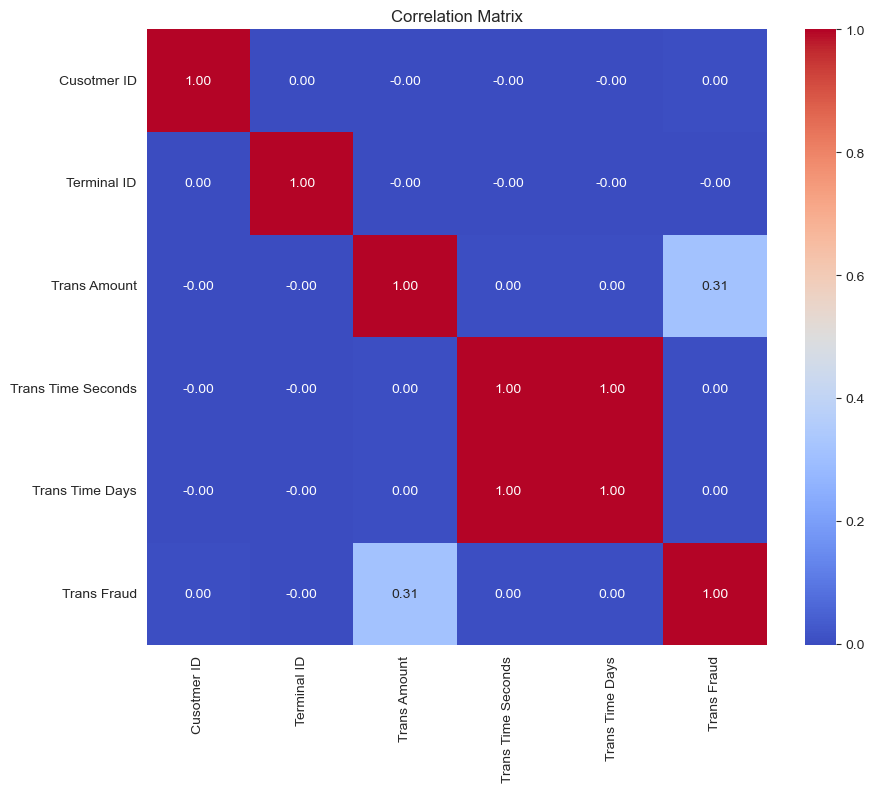

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

It seems that the amount of the transaction is correlated with whether it is a fraudulent transaction or not.

In [52]:
df[df['Trans Fraud'] == 1]['Trans Amount'].describe()

count    235969.000000
mean       1477.560343
std        2973.502497
min           0.200000
25%        1085.040000
50%        1212.470000
75%        1410.640000
max      647837.500000
Name: Trans Amount, dtype: float64

In [53]:
df[df['Trans Fraud'] == 0]['Trans Amount'].describe()

count    1.518186e+06
mean     3.939092e+02
std      2.753447e+02
min      0.000000e+00
25%      1.530100e+02
50%      3.533000e+02
75%      6.054000e+02
max      1.000000e+03
Name: Trans Amount, dtype: float64

## 4. Data transforming

### 4.1 Features and targets selection

We first select the features of each instance of the data ("x"), and the labels corresponding to its classification ("y").

In [13]:
x = df.drop('Trans Fraud', axis=1).values
y = df['Trans Fraud'].values

print(x)
print(x.shape, '\n')

print(y)
print(y.shape, '\n')

[[5.9600000e+02 3.1560000e+03 5.3307000e+02 3.1000000e+01 0.0000000e+00]
 [4.9610000e+03 3.4120000e+03 8.0856000e+02 1.3000000e+02 0.0000000e+00]
 [2.0000000e+00 1.3650000e+03 1.4429400e+03 4.7600000e+02 0.0000000e+00]
 ...
 [6.1800000e+02 1.5020000e+03 2.6620000e+01 1.5811101e+07 1.8200000e+02]
 [4.0560000e+03 3.0670000e+03 5.5043000e+02 1.5811192e+07 1.8200000e+02]
 [3.5420000e+03 9.8490000e+03 2.1657000e+02 1.5811197e+07 1.8200000e+02]]
(1754155, 5) 

[0 0 1 ... 0 0 0]
(1754155,) 



### 4.2 Imbalancing technique

To solve the problem of bias in the data, an oversampling technique will be carried out. In this case, the Synthetic Minority Oversampling Technique (SMOTE) will be used to generate synthetic data by oversampling.

In [14]:
s = SMOTE()
x_data, y_data = s.fit_resample(x,y)

print(Counter(y_data))

Counter({0: 1518186, 1: 1518186})


### 4.3 Standardized of the data

In [15]:
# Standard Scaler
ss = SS()
x_data = ss.fit_transform(x_data)

### 4.4 Data splitting

In [16]:
x_train, x_test, y_train, y_test = tts(x_data, y_data, test_size=0.3, random_state=42)

## 5. Building model

Once the data is ready, the model can now be built and trained. For this, a classifier based on Logistic Regression will be used, to subsequently obtain predictions and perform the metrics associated with the model.

### 5.1 Training the model and making predictions

In [17]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

## 6. Metrics of the model

Regarding the metrics, the accuracy and the confusion matrix will be obtained.

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Gets the values of TN, FN, TP, FP from the confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

Model Accuracy: 95.88%
Number of True Negatives: 432275
Number of False Negatives: 14384
Number of True Positives: 441124
Number of False Positives: 23129


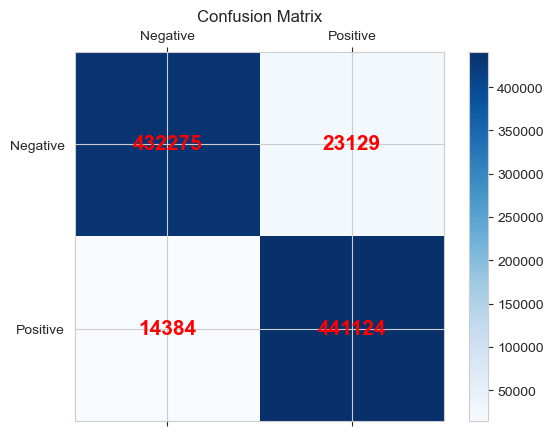

In [19]:
print(f'Model Accuracy: {round(accuracy_score(y_test , y_pred)*100, 2)}%')
print(f'Number of True Negatives: {TN}')
print(f'Number of False Negatives: {FN}')
print(f'Number of True Positives: {TP}')
print(f'Number of False Positives: {FP}')

# Create the confusion matrix
confusion_matrix = [[TN, FP], [FN, TP]]

# Set up the chart
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)
plt.colorbar(cax)

# Define ticks and labels
ticks = [0, 1]
tick_labels = ['Negative', 'Positive']

# Set the ticks and labels on the axes
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)

# Shows the values in the confusion matrix
text_style = {'color': 'red', 'weight': 'bold'}
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(confusion_matrix[i][j]),
                va='center',
                ha='center',
                fontsize=15,
                **text_style)

plt.title('Confusion Matrix')
plt.show()

## 7. Conclusion

* Considering the accuracy performance reaching 95.88%, it can be concluded that the oversampling technique (SMOTE) was successful. This allowed the model to be trained accurately, resulting in remarkably accurate predictions. Furthermore, the logistic regression parameters were appropriately fitted, contributing to this outstanding performance.